In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv')

df.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2432484,23612,0,0,6670
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3633776,135387,0,0,23401
2,kmXkr7I8gYo,Tank Davis vs Roach FIGHT HIGHLIGHTS | Premier...,"In a back and forth battle At Barclays Center,...",2025-03-02T05:45:58Z,UC2Ss8mXyksW2SQfhhUpgR2g,Sports On Prime,17,[],PT6M10S,hd,False,490515,4058,0,0,2356
3,fpBqWFhefNA,Gervonta Davis FULL Post Fight Press Conferenc...,In this video we hear from Gervonta Davis afte...,2025-03-02T07:56:54Z,UCwdVyruxCCqMR4DtPLhtwlg,Fight Hub TV,17,"['boxing', 'fight hub', 'fight hub tv', 'fight...",PT14M15S,hd,False,570743,7528,0,0,4267
4,1mtJvsfAtF0,Sabrina Carpenter - Espresso/Bed Chem (Live at...,Sabrina Carpenter performs “Espresso” & “Bed C...,2025-03-02T02:30:47Z,UC4mYKePIas5YgGfYZ2J2OxQ,SabrinaCarpenterVEVO,10,"['Sabrina Carpenter', 'Island Records', 'Pop']",PT5M13S,hd,True,1510500,89958,0,0,4067


In [3]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [4]:
top_videos_by_likes = df.pivot_table(index='title', 
                                     values='like_count'
                                     ).sort_values('like_count', ascending=False).head(10)

top_videos_by_likes = top_videos_by_likes.reset_index()
top_videos_by_likes

,title,like_count
0,I Spent 100 Hours Inside The Pyramids!,4612696.0
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,3038586.0
2,"JENNIE, Doechii - ExtraL (Official Video)",1621049.0
3,100 People Trapped Inside 100 Circles For $500...,1254039.0
4,LISA - FUTW (Vixi Solo Version) (Official Musi...,1173580.0
5,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,567801.0
6,JENNIE - Ruby (Official Album Sampler),554403.0
7,IS THIS THE BEST BRAWLER EVER?!,507149.0
8,Hearts2Hearts 하츠투하츠 'The Chase' MV,479471.0
9,G-DRAGON - DRAMA (Official Video),427238.0


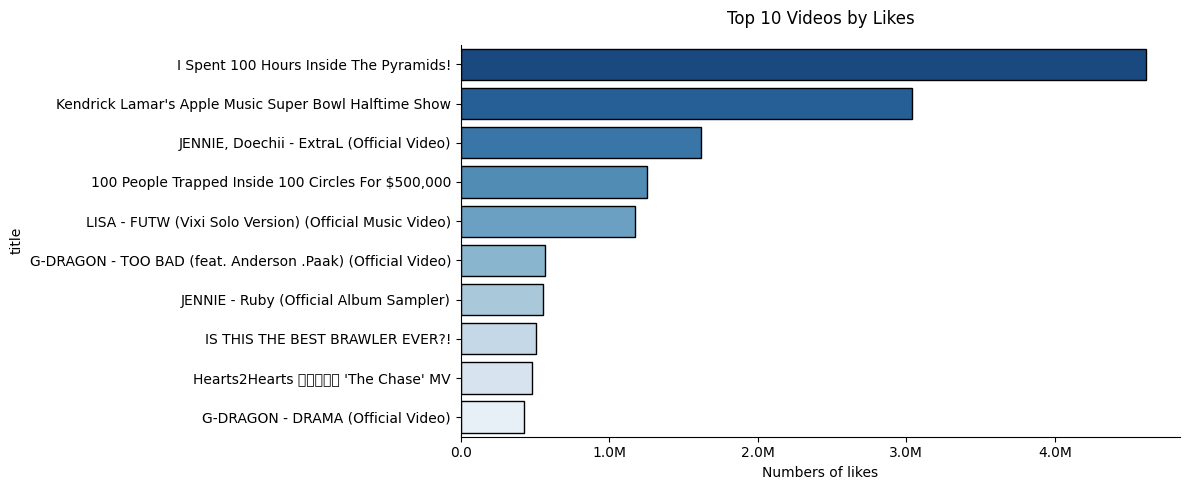

In [11]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_videos_by_likes,
            x='like_count',
            y='title',
            palette='Blues_r',
            edgecolor='k'
            )

def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Videos by Likes', pad=15)
plt.xlabel('Numbers of likes')

sns.despine()
plt.tight_layout()
plt.show()

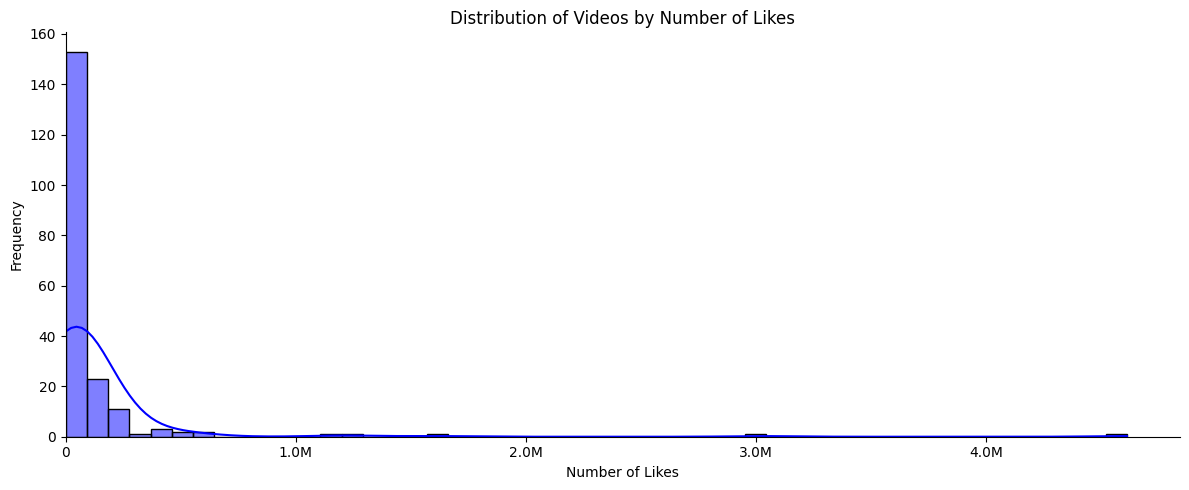

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df,
             x='like_count',
             bins=50,
             color='blue',
             kde=True,
             edgecolor='k'
             )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Likes')
plt.ylabel('Frequency')
plt.xlabel('Number of Likes')
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()
